<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Share_by_Me/Simple_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Perceptron

This notebook guides you to understand the working principle of simple perceptron on AND, OR, XOR datasets ,and you will see that a simple layer perceptron cannot linearly separate the non-linear datasets which are very common to find in real world datasets.

The Perceptron acts as a big-shoulder to build more advanced multi-layer networks.

So, here I'll be demonstrating the simple perceptron on AND, OR and XOR datasets. 

Below is a figure of simple perceptron network which contains N input nodes, one for each entry in the input row of the design matrix, follwed by only one layer in the network with just a single node in that layer. 



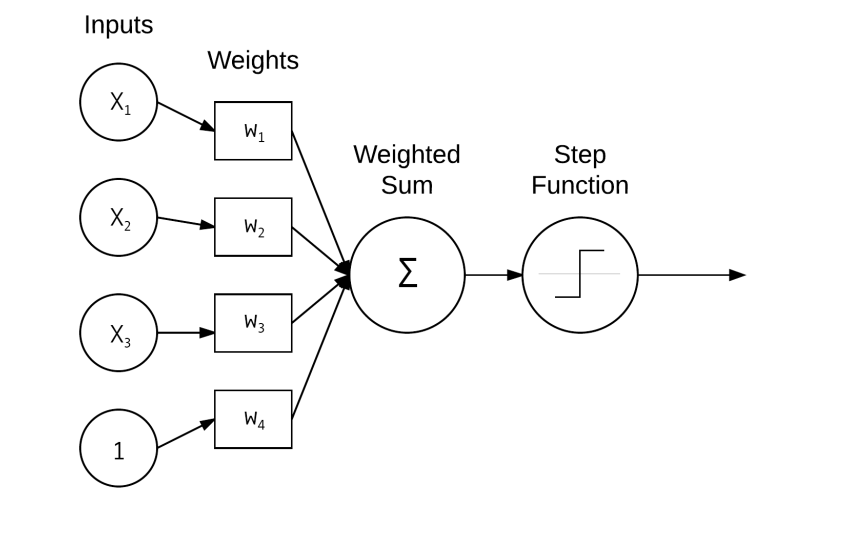


In [7]:
import numpy as np

In [16]:
class Perceptron:
  def __init__(self, N, alpha=0.1):

    self.W = np.random.randn(N+1)/np.sqrt(N)
    self.alpha = alpha
# N: the number of columns in our input feature vectors
# alpha : learning rate.Common choices of learning rates are normally in the range 0.1,0.01,0.001
  def step(self, x):
    return 1 if x>0 else 0

  def fit(self,X,y,epochs=10):

    X = np.c_[X,np.ones((X.shape[0]))]
    for epoch in np.arange(0,epochs):
      for (x,target) in zip(X,y):
        p = self.step(np.dot(x,self.W))
        if p!= target:
          error = p - target
          self.W += -self.alpha*error*x
  def predict(self,X,addBias = True):

    X = np.atleast_2d(X)
    if addBias:
      X = np.c_[X,np.ones((X.shape[0]))]

    return self.step(np.dot(X,self.W))

### Testing with OR dataset

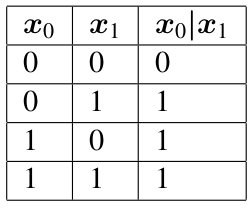

In [17]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
print("[INFO] testing perceptron...")
for (x,target) in zip(X,y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x,target[0],pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


### Testing with AND dataset

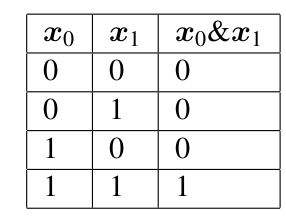

In [18]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
print("[INFO] testing perceptron...")
for (x,target) in zip(X,y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x,target[0],pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


### Testing with XOR dataset

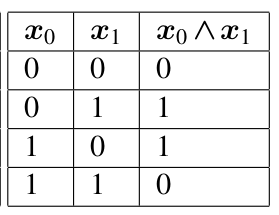

In [19]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
print("[INFO] testing perceptron...")
for (x,target) in zip(X,y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x,target[0],pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


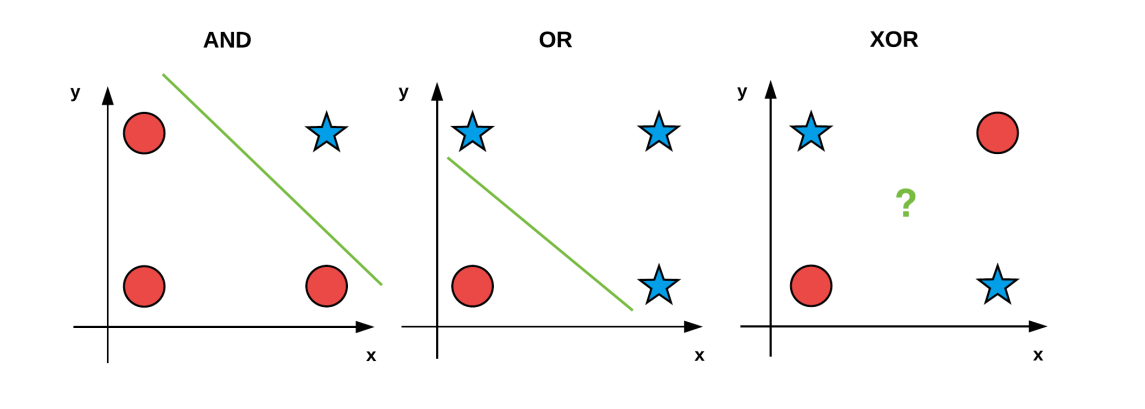

Now you can see that XOR dataset cannot be linearly separated by one layer perceptron.To be able to separate the XOR data, what we need is more layers and with that, comes the start of deep learning. 

References:

Adrian Starter Bundle Chapter 10- Page 130:Perceptron Architecture
You can search the book on [my repo](https://github.com/waiyankyaw961999/ML_DL_learningpath/tree/master/PyImagsearch/Starter%20bundle%201).

[Rosenblatt (1958), The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)

[Minsky and Papert (1969), Perceptrons: an introduction to computational geometry](https://science.sciencemag.org/content/165/3895/780/tab-pdf)